## Recommendation System

Data Description:

Unique ID of each anime.
Anime title.
Anime broadcast type, such as TV, OVA, etc.
anime genre.
The number of episodes of each anime.
The average rating for each anime compared to the number of users who gave ratings.
Number of community members for each anime.

## Objective:
The objective of this assignment is to implement a recommendation system using cosine similarity on an anime dataset. 
Dataset:
Use the Anime Dataset which contains information about various anime, including their titles, genres,No.of episodes and user ratings etc.



In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity


In [118]:
df=pd.read_csv("anime.csv")

In [119]:
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


## Tasks:


### Data Preprocessing:

Load the dataset into a suitable data structure (e.g., pandas DataFrame).

Handle missing values, if any.

Explore the dataset to understand its structure and attributes.


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [121]:
df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


### checking for null values

In [122]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

### checking for duplicated values

In [123]:
df[df.duplicated()]

,anime_id,name,genre,type,episodes,rating,members


## treating missing values

In [124]:
df.nunique()

anime_id    12294
name        12292
genre        3264
type            6
episodes      187
rating        598
members      6706
dtype: int64

In [125]:
df.rating.unique()

array([ 9.37,  9.26,  9.25,  9.17,  9.16,  9.15,  9.13,  9.11,  9.1 ,
        9.06,  9.05,  9.04,  8.98,  8.93,  8.92,  8.88,  8.84,  8.83,
        8.82,  8.81,  8.8 ,  8.78,  8.77,  8.76,  8.75,  8.74,  8.73,
        8.72,  8.71,  8.69,  8.68,  8.67,  8.66,  8.65,  8.64,  8.62,
        8.61,  8.6 ,  8.59,  8.58,  8.57,  8.56,  8.55,  8.54,  8.53,
        8.52,  8.51,  8.5 ,  8.49,  8.48,  8.47,  8.46,  8.45,  8.44,
        8.43,  8.42,  8.41,  8.4 ,  8.39,  8.38,  8.37,  8.36,  8.35,
        8.34,  8.33,  8.32,  8.31,  8.3 ,  8.29,  8.28,  8.27,  8.26,
        8.25,  8.24,  8.23,  8.22,  8.21,  8.2 ,  8.19,  8.18,  8.17,
        8.16,  8.15,  8.14,  8.13,  8.12,  8.11,  8.1 ,  8.09,  8.08,
        8.07,  8.06,  8.05,  8.04,  8.03,  8.02,  8.01,  8.  ,  7.99,
        7.98,  7.97,  7.96,  7.95,  7.94,  7.93,  7.92,  7.91,  7.9 ,
        7.89,  7.88,  7.87,  7.86,  7.85,  7.84,  7.83,  7.82,  7.81,
        7.8 ,  7.79,  7.78,  7.77,  7.76,  7.75,  7.74,  7.73,  7.72,
        7.71,  7.7 ,

In [126]:
df.rating.value_counts()

rating
6.00    141
7.00     99
6.50     90
6.25     84
5.00     76
       ... 
3.47      1
3.71      1
3.87      1
3.91      1
3.14      1
Name: count, Length: 598, dtype: int64

In [127]:
df.rating.isnull().sum()

230

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='rating', ylabel='Count'>

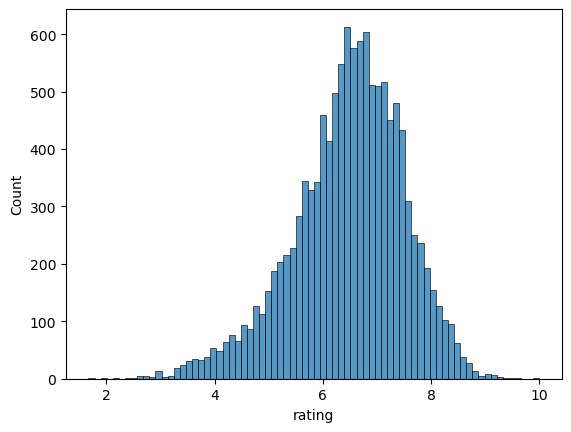

In [128]:
sns.histplot(df['rating'])

In [129]:
df.rating.median()

6.57

In [130]:
df['rating']=df['rating'].fillna(df.rating.median())

In [131]:
df['rating'].isnull().sum()

0

In [132]:
df['genre'].fillna('Unknown', inplace=True)
df['type'].fillna('Unknown', inplace=True)

In [133]:
df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [134]:
df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

### make a list of  column
### split the genre 

In [135]:
name=df['name'].tolist()
genre=df['genre'].str.split(',').tolist()

In [136]:
def create_bow(genre_list):
    bow={}
    for genre in genre_list:
        bow[genre]=1
    return bow

In [137]:
bag_of_words=[create_bow(anime_genre)for anime_genre in genre]
bag_of_words

[{'Drama': 1, ' Romance': 1, ' School': 1, ' Supernatural': 1},
 {'Action': 1,
  ' Adventure': 1,
  ' Drama': 1,
  ' Fantasy': 1,
  ' Magic': 1,
  ' Military': 1,
  ' Shounen': 1},
 {'Action': 1,
  ' Comedy': 1,
  ' Historical': 1,
  ' Parody': 1,
  ' Samurai': 1,
  ' Sci-Fi': 1,
  ' Shounen': 1},
 {'Sci-Fi': 1, ' Thriller': 1},
 {'Action': 1,
  ' Comedy': 1,
  ' Historical': 1,
  ' Parody': 1,
  ' Samurai': 1,
  ' Sci-Fi': 1,
  ' Shounen': 1},
 {'Comedy': 1, ' Drama': 1, ' School': 1, ' Shounen': 1, ' Sports': 1},
 {'Action': 1, ' Adventure': 1, ' Shounen': 1, ' Super Power': 1},
 {'Drama': 1, ' Military': 1, ' Sci-Fi': 1, ' Space': 1},
 {'Action': 1,
  ' Comedy': 1,
  ' Historical': 1,
  ' Parody': 1,
  ' Samurai': 1,
  ' Sci-Fi': 1,
  ' Shounen': 1},
 {'Action': 1,
  ' Comedy': 1,
  ' Historical': 1,
  ' Parody': 1,
  ' Samurai': 1,
  ' Sci-Fi': 1,
  ' Shounen': 1},
 {'Drama': 1,
  ' Fantasy': 1,
  ' Romance': 1,
  ' Slice of Life': 1,
  ' Supernatural': 1},
 {'Drama': 1, ' School':

In [138]:
genre_df = pd.DataFrame(bag_of_words, index=name).fillna(0)
genre_df

,Drama,Romance,School,Supernatural,Action,Adventure,Drama,Fantasy,Magic,Military,...,Supernatural,Samurai,Super Power,Vampire,Space,Hentai,Yaoi,Hentai,Yuri,Yaoi
Kimi no Na wa.,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fullmetal Alchemist: Brotherhood,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gintama°,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Steins;Gate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gintama&#039;,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Toushindai My Lover: Minami tai Mecha-Minami,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Under World,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Violence Gekiga David no Hoshi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Violence Gekiga Shin David no Hoshi: Inma Densetsu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### cosine similarity

In [139]:
cosine_similarity = cosine_similarity(genre_df)

### similarity

In [140]:
similarity_df = pd.DataFrame(cosine_similarity, index=genre_df.index, columns=genre_df.index)
similarity_df

,Kimi no Na wa.,Fullmetal Alchemist: Brotherhood,Gintama°,Steins;Gate,Gintama&#039;,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou,Hunter x Hunter (2011),Ginga Eiyuu Densetsu,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare,Gintama&#039;: Enchousen,...,Super Erotic Anime,Taimanin Asagi 3,Teleclub no Himitsu,Tenshi no Habataki Jun,The Satisfaction,Toushindai My Lover: Minami tai Mecha-Minami,Under World,Violence Gekiga David no Hoshi,Violence Gekiga Shin David no Hoshi: Inma Densetsu,Yasuji no Pornorama: Yacchimae!!
Kimi no Na wa.,1.0,0.000000,0.000000,0.0,0.000000,0.223607,0.000000,0.250000,0.000000,0.000000,...,0.0,0.288675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fullmetal Alchemist: Brotherhood,0.0,1.000000,0.285714,0.0,0.285714,0.338062,0.566947,0.188982,0.285714,0.285714,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gintama°,0.0,0.285714,1.000000,0.0,1.000000,0.169031,0.377964,0.188982,1.000000,1.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Steins;Gate,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gintama&#039;,0.0,0.285714,1.000000,0.0,1.000000,0.169031,0.377964,0.188982,1.000000,1.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Toushindai My Lover: Minami tai Mecha-Minami,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Under World,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Violence Gekiga David no Hoshi,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Violence Gekiga Shin David no Hoshi: Inma Densetsu,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Ask the user for a anime they like


In [142]:
anime = input('Enter a anime you like: ')


Enter a anime you like:  Under World


In [109]:
anime_index = similarity_df.index.get_loc(anime)
anime_index

12290

###  Get the top 5 most similar anime to recommend 


In [111]:
top_10 = similarity_df.iloc[anime_index].sort_values(ascending=False)[1:11]
top_10

Eromame                                          1.0
Bakunyuu Shimai                                  1.0
Mahou Shoujo Isuka                               1.0
Last Waltz: Hakudaku Mamire no Natsu Gasshuku    1.0
Immoral                                          1.0
Iinari! Saimin Kanojo                            1.0
Cool Devices                                     1.0
Bakunyuu Maid Kari                               1.0
Shiofuki Mermaid                                 1.0
Shintaisou: Kari                                 1.0
Name: Under World, dtype: float64

In [113]:
print(f'Top 10 similar anime to {anime}:')
print(top_10)

Top 10 similar anime to Under World:
Eromame                                          1.0
Bakunyuu Shimai                                  1.0
Mahou Shoujo Isuka                               1.0
Last Waltz: Hakudaku Mamire no Natsu Gasshuku    1.0
Immoral                                          1.0
Iinari! Saimin Kanojo                            1.0
Cool Devices                                     1.0
Bakunyuu Maid Kari                               1.0
Shiofuki Mermaid                                 1.0
Shintaisou: Kari                                 1.0
Name: Under World, dtype: float64


In [ ]:
### conclusion:
in thist assignment we have anime dataset we build a recomendation system based on cosine similarites